## Project 2: Ames Housing Data and Kaggle Challenge

#### Objective: 
- creating a regression model based on the Ames Housing Dataset. 
- predict the price of a house at sale.

https://www.kaggle.com/t/cf68f4a276f44b59a3c6c843dbf9ed1e)

### Import all libraries required for this project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import datetime
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn import metrics
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.model_selection import GridSearchCV

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Import train data_set

In [3]:
# training data sets
df=pd.read_csv("datasets/train.csv")

In [4]:
df.head(5)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
# Train set has 2051 rows and 81 columns
df.shape

(2051, 81)

In [6]:
df.dtypes

Id                   int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
B

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
MS SubClass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
Lot Frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
Overall Qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
Overall Cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
Year Built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
Year Remod/Add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
Mas Vnr Area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


### Analyze the missing data values

In [8]:
# To check columns with missing values and rank in descending order
df_new=pd.DataFrame(df.isnull().sum())
df_new['by pct']=df_new[0]/len(df)
df_new[df_new[0].values>0].sort_values('by pct', ascending=False)

,0,by pct
Pool QC,2042,0.995612
Misc Feature,1986,0.968308
Alley,1911,0.931741
Fence,1651,0.804973
Fireplace Qu,1000,0.487567
Lot Frontage,330,0.160897
Garage Yr Blt,114,0.055583
Garage Cond,114,0.055583
Garage Qual,114,0.055583
Garage Finish,114,0.055583


#### Data dictionary:
http://jse.amstat.org/v19n3/decock/DataDocumentation.txt

### Missing ordinal data
- Pool QC: NA (no pool) 
- Fence: NA (no fence)
- Fireplace Qu: NA (No Fireplace)
- Garage Cond: NA (No Garage)
- Garage Qual: NA (No Garage)
- Garage Finish: NA (No Garage)
- Bsmt Exposure: NA (No Basement)
- BsmtFinType 1: NA (No Basement)
- BsmtFinType 2: NA (No Basement)
- Bsmt Cond: NA (No Basement)
- Bsmt Qual: NA (No Basement)

#### we will use data inputation to map the NA values for the missing ordinal data 

In [9]:
#Pool QC (Ordinal): Pool quality
pool_qc_map={
'Ex':4,
'Gd':3,
'TA':2, 
'Fa':1,
np.nan:0
}
df['pool_qc_map'] = df['Pool QC'].map(pool_qc_map)
df.drop('Pool QC',axis=1,inplace=True)


#Fence (Ordinal): Fence quality
fence_map={
'GdPrv':4,
'MnPrv':3,
'GdWo':2, 
'MnWw':1,
np.nan:0
}
df['fence_map'] = df['Fence'].map(fence_map)
df.drop('Fence',axis=1,inplace=True)


#FireplaceQu (Ordinal): Fireplace quality
fireplace_q_map={
'Ex':5,
'Gd':4,
'TA':3, 
'Fa':2,
'Po':1,
np.nan:0
}
df['fireplace_q_map'] = df['Fireplace Qu'].map(fireplace_q_map)
df.drop('Fireplace Qu',axis=1,inplace=True)

#Garage Cond (Ordinal): Garage condition
garage_cond_map={
'Ex':5,
'Gd':4,
'TA':3, 
'Fa':2,
'Po':1,
np.nan:0
}
df['garage_cond_map'] = df['Garage Cond'].map(garage_cond_map)
df.drop('Garage Cond',axis=1,inplace=True)

#Garage Qual (Ordinal): Garage quality
garage_q_map={
'Ex':5,
'Gd':4,
'TA':3, 
'Fa':2,
'Po':1,
np.nan:0
}
df['garage_q_map'] = df['Garage Qual'].map(garage_q_map)
df.drop('Garage Qual',axis=1,inplace=True)

#Garage Finish (Ordinal): Interior finish of the garage
garage_finish_map={
'Fin':3,
'RFn':2,
'Unf':1, 
np.nan:0
}
df['garage_finish_map'] = df['Garage Finish'].map(garage_finish_map)
df.drop('Garage Finish',axis=1,inplace=True)

#Bsmt Exposure (Ordinal): Refers to walkout or garden level walls
bsmt_exposure_map={
'Gd':4,
'Av':3,
'Mn':2,
'No':1,
np.nan:0
}
df['bsmt_exposure_map'] = df['Bsmt Exposure'].map(bsmt_exposure_map)
df.drop('Bsmt Exposure',axis=1,inplace=True)

#BsmtFin Type 1	(Ordinal): Rating of basement finished area
bsmtfin_type_1_map={
'GLQ':5,
'ALQ':4,
'BLQ':3,
'Rec':3,
'LwQ':2,
'Unf':1,
np.nan:0
}
df['bsmtfin_type_1_map'] = df['BsmtFin Type 1'].map(bsmtfin_type_1_map)
df.drop('BsmtFin Type 1',axis=1,inplace=True)


#BsmtFinType 2	(Ordinal): Rating of basement finished area (if multiple types)
bsmtfin_type_2_map={
'GLQ':5,
'ALQ':4,
'BLQ':3,
'Rec':3,
'LwQ':2,
'Unf':1,
np.nan:0
}
df['bsmtfin_type_2_map'] = df['BsmtFin Type 2'].map(bsmtfin_type_2_map)
df.drop('BsmtFin Type 2',axis=1,inplace=True)

#Bsmt Cond (Ordinal): Evaluates the general condition of the basement
bsmt_cond_map={
'Ex':5,
'Gd':4,
'TA':3,
'Fa':2,
'Po':1,
np.nan:0
}
df['bsmt_cond_map'] = df['Bsmt Cond'].map(bsmt_cond_map)
df.drop('Bsmt Cond',axis=1,inplace=True)

#Bsmt Qual (Ordinal): Evaluates the height of the basement
bsmt_qual_map={
'Ex':5,
'Gd':4,
'TA':3,
'Fa':2,
'Po':1,
np.nan:0
}
df['bsmt_qual_map'] = df['Bsmt Qual'].map(bsmt_qual_map)
df.drop('Bsmt Qual',axis=1,inplace=True)

In [10]:
# To check columns with missing values and rank in descending order
df_new=pd.DataFrame(df.isnull().sum())
df_new['by pct']=df_new[0]/len(df)
df_new[df_new[0].values>0].sort_values('by pct', ascending=False)

,0,by pct
Misc Feature,1986,0.968308
Alley,1911,0.931741
Lot Frontage,330,0.160897
Garage Yr Blt,114,0.055583
Garage Type,113,0.055095
Mas Vnr Type,22,0.010726
Mas Vnr Area,22,0.010726
Bsmt Full Bath,2,0.000975
Bsmt Half Bath,2,0.000975
BsmtFin SF 1,1,0.000488


### Missing Nominal/Continuous Values

- Misc Feature (Nominal): Miscellaneous feature not covered in other categories
    - Elev	Elevator
    - Gar2	2nd Garage (if not described in garage section)
    - Othr	Other
    - Shed	Shed (over 100 SF)
    - TenC	Tennis Court
    - NA	None
           

- Alley (Nominal): Type of alley access to property
    - Grvl	Gravel
    - Pave	Paved
    - NA 	No alley access


- Lot Frontage (Continuous): Linear feet of street connected to property

- Garage Yr Blt (Discrete): Year garage was built


- Mas Vnr Type (Nominal): Masonry veneer type
   - BrkCmn	Brick Common
   - BrkFace	Brick Face
   - CBlock	Cinder Block
   - None	None
   - Stone	Stone
   
   
- Bsmt Full Bath (Discrete): Basement full bathrooms

- Bsmt Half Bath (Discrete): Basement half bathrooms

- BsmtFin SF 1 (Continuous): Type 1 finished square feet

- BsmtFin SF 2 (Continuous): Type 2 finished square feet

- Bsmt Unf SF (Continuous): Unfinished square feet of basement area

- Total Bsmt SF (Continuous): Total square feet of basement area

- Garage Cars (Discrete): Size of garage in car capacity

- Garage Area (Continuous): Size of garage in square feet

In [11]:
# 1. Misc Feature (Nominal): Miscellaneous feature not covered in other categories
    # Elev	Elevator
    # Gar2	2nd Garage (if not described in garage section)
    # Othr	Other
    # Shed	Shed (over 100 SF)
    # TenC	Tennis Court
    # NA	None

print(df['Misc Feature'].unique())
df['Misc Feature'].value_counts()

[nan 'Shed' 'TenC' 'Gar2' 'Othr' 'Elev']


Shed    56
Gar2     4
Othr     3
Elev     1
TenC     1
Name: Misc Feature, dtype: int64

In [12]:
df['Misc Feature']=df['Misc Feature'].fillna('NA')

In [13]:
# 2. Alley (Nominal): Type of alley access to property
    # Grvl	Gravel
    # Pave	Paved
    # NA 	No alley access
    
print(df['Alley'].unique())
df['Alley'].value_counts()

[nan 'Pave' 'Grvl']


Grvl    85
Pave    55
Name: Alley, dtype: int64

In [14]:
df['Alley']=df['Alley'].fillna('NA')

In [15]:
# 3. Lot Frontage (Continuous): Linear feet of street connected to property
    
df['Lot Frontage']=df['Lot Frontage'].fillna(0)

In [16]:
# 4. Garage Yr Blt (Discrete): Year garage was built
# drop the column because we couln't infer the missing data, we assume that there is nothing special about this column
df.drop('Garage Yr Blt',axis=1,inplace=True)

In [17]:
# 5. Garage Type (Nominal): Garage location
    # 2Types	More than one type of garage
    # Attchd	Attached to home
    # Basment	Basement Garage
    # BuiltIn	Built-In (Garage part of house - typically has room above garage)
    # CarPort	Car Port
    # Detchd	Detached from home
    # NA	No Garage
print(df['Garage Type'].unique())
df['Garage Type'].value_counts()

['Attchd' 'Detchd' 'BuiltIn' 'Basment' nan '2Types' 'CarPort']


Attchd     1213
Detchd      536
BuiltIn     132
Basment      27
2Types       19
CarPort      11
Name: Garage Type, dtype: int64

In [18]:
# We can set the garage type to 'NA' as there isn't a garage
df[(df['garage_finish_map']==0) & (df['Garage Type'].isnull()==True)][['garage_finish_map','Garage Type']].head()

,garage_finish_map,Garage Type
28,0,NaN
53,0,NaN
65,0,NaN
79,0,NaN
101,0,NaN


In [19]:
# We set Mas Vnr Type to NA since the Mas Vnr Area is also NAN
df[(df['Mas Vnr Type'].isnull()==True) & (df['Mas Vnr Area'].isnull()==True)][['Mas Vnr Type','Mas Vnr Area']].head()

,Mas Vnr Type,Mas Vnr Area
22,NaN,NaN
41,NaN,NaN
86,NaN,NaN
212,NaN,NaN
276,NaN,NaN


In [20]:
df[['Garage Type','Mas Vnr Type']]=df[['Garage Type','Mas Vnr Type']].fillna('NA')
df['Mas Vnr Area']=df['Mas Vnr Area'].fillna(0)


In [21]:
# The 2 missing values (Basement Bathroom) should be updated to 0 since there isn't a basement
df[df['Bsmt Full Bath'].isnull()][['Id','PID','Full Bath','Half Bath','Bsmt Full Bath','Bsmt Half Bath','bsmt_qual_map','bsmt_cond_map']]

,Id,PID,Full Bath,Half Bath,Bsmt Full Bath,Bsmt Half Bath,bsmt_qual_map,bsmt_cond_map
616,1498,908154080,3,1,NaN,NaN,0,0
1327,1342,903230120,1,0,NaN,NaN,0,0


In [22]:
# To update the values to 0 since there isn't a basement 
df[df['BsmtFin SF 1'].isnull()][['Id','PID','Bsmt Full Bath','Bsmt Half Bath','BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','bsmt_qual_map','bsmt_cond_map']]

,Id,PID,Bsmt Full Bath,Bsmt Half Bath,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,bsmt_qual_map,bsmt_cond_map
1327,1342,903230120,NaN,NaN,NaN,NaN,NaN,0,0


In [23]:
# update value to zero since property does not have any basement 
df[['Bsmt Full Bath','Bsmt Half Bath','BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF']]=df[['Bsmt Full Bath','Bsmt Half Bath','BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF']].fillna(0)

In [24]:
df[df['Garage Cars'].isnull()][['Id','PID','garage_q_map','garage_cond_map','Garage Type','Garage Cars','Garage Area']]

,Id,PID,garage_q_map,garage_cond_map,Garage Type,Garage Cars,Garage Area
1712,2237,910201180,0,0,Detchd,NaN,NaN


In [25]:
# update value to zero - (has no garage under quality and condition) but garage type is detached from the property
df[['Garage Cars','Garage Area']]=df[['Garage Cars','Garage Area']].fillna(0)

In [26]:
# To check columns with missing values and rank in descending order
df_new=pd.DataFrame(df.isnull().sum())
df_new['by pct']=df_new[0]/len(df)
df_new[df_new[0].values>0].sort_values('by pct', ascending=False)

,0,by pct


### For the Non Missing ordinal data, we map it uisng a custom encoding\mapping scheme

In [27]:
#Lot Shape (Ordinal): General shape of property
lot_shape_map={
'Reg':4,
'IR1':3,
'IR2':2,
'IR3':1
}
df['lotshape_map'] = df['Lot Shape'].map(lot_shape_map)
df.drop('Lot Shape',axis=1,inplace=True)

#Utilities (Ordinal): Type of utilities available
utilities_map={
'AllPub':4,
'NoSewr':3,
'NoSeWa':2,
'ELO':1
}
df['utilities_map'] = df['Utilities'].map(utilities_map)
df.drop('Utilities',axis=1,inplace=True)

#Land Slope (Ordinal): Slope of property
land_slope_map={
'Gtl':3,
'Mod':2,
'Sev':1
}
df['land_slope_map'] = df['Land Slope'].map(land_slope_map)
df.drop('Land Slope',axis=1,inplace=True)

#Exter Qual (Ordinal): Evaluates the quality of the material on the exterior 
exter_qual_map={
'Ex':5,
'Gd':4,
'TA':3,
'Fa':2,
'Po':1
}
df['exter_qual_map'] = df['Exter Qual'].map(exter_qual_map)
df.drop('Exter Qual',axis=1,inplace=True)

#Exter Cond (Ordinal): Evaluates the present condition of the material on the exterior
exter_cond_map={
'Ex':5,
'Gd':4,
'TA':3,
'Fa':2,
'Po':1
}
df['exter_cond_map'] = df['Exter Cond'].map(exter_cond_map)
df.drop('Exter Cond',axis=1,inplace=True)

#HeatingQC (Ordinal): Heating quality and condition
heating_qc_map={
'Ex':5,
'Gd':4,
'TA':3,
'Fa':2,
'Po':1
}
df['heating_qc_map'] = df['Heating QC'].map(heating_qc_map)
df.drop('Heating QC',axis=1,inplace=True)

#Central Air (Nominal): Central air conditioning
df['Central Air']=df['Central Air'].map({'Y':1,'N':0})

#Electrical (Ordinal): Electrical system
electrical_map={
'SBrkr':5,
'FuseA':4,
'FuseF':3,
'FuseP':2,
'Mix':1
}
df['electrical_map'] = df['Electrical'].map(electrical_map)
df.drop('Electrical',axis=1,inplace=True)

#KitchenQual (Ordinal): Kitchen quality
kitchen_qual_map={
'Ex':5,
'Gd':4,
'TA':3,
'Fa':2,
'Po':1
}
df['kitchen_qual_map'] = df['Kitchen Qual'].map(kitchen_qual_map)
df.drop('Kitchen Qual',axis=1,inplace=True)


#Functional (Ordinal): Home functionality (Assume typical unless deductions are warranted)
functional_map={
'Typ':8,
'Min1':7,
'Min2':6,
'Mod':5,
'Maj1':4,
'Maj2':3,
'Sev':2,
'Sal':1
}
df['functional_map'] = df['Functional'].map(functional_map)
df.drop('Functional',axis=1,inplace=True)


#Paved Drive (Ordinal): Paved driveway
df['Paved Drive']=df['Paved Drive'].map({'Y':2,'P':1,'N':0})

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2198.0,2930.0
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,907180080.0,924152030.0
MS SubClass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,70.0,190.0
Lot Frontage,2051.0,5.794442e+01,3.313733e+01,0.0,43.5,63.0,78.0,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,11513.5,159000.0
Overall Qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.0,10.0
Overall Cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.0,9.0
Year Built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2001.0,2010.0
Year Remod/Add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2004.0,2010.0
Mas Vnr Area,2051.0,9.862652e+01,1.743247e+02,0.0,0.0,0.0,159.0,1600.0


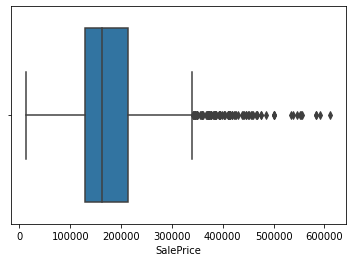

In [29]:
sns.boxplot(x=df['SalePrice']);

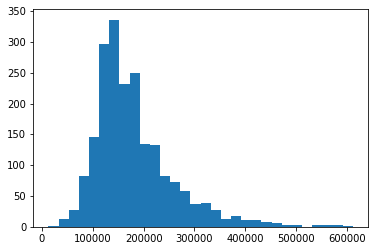

In [30]:
plt.hist(df['SalePrice'], bins=30);

In [31]:
df['SalePrice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

####  From the above, we see that the mean sale price is 181,469, outliers from 325k onwards. It is a right skewed distribution


### Perform EDA

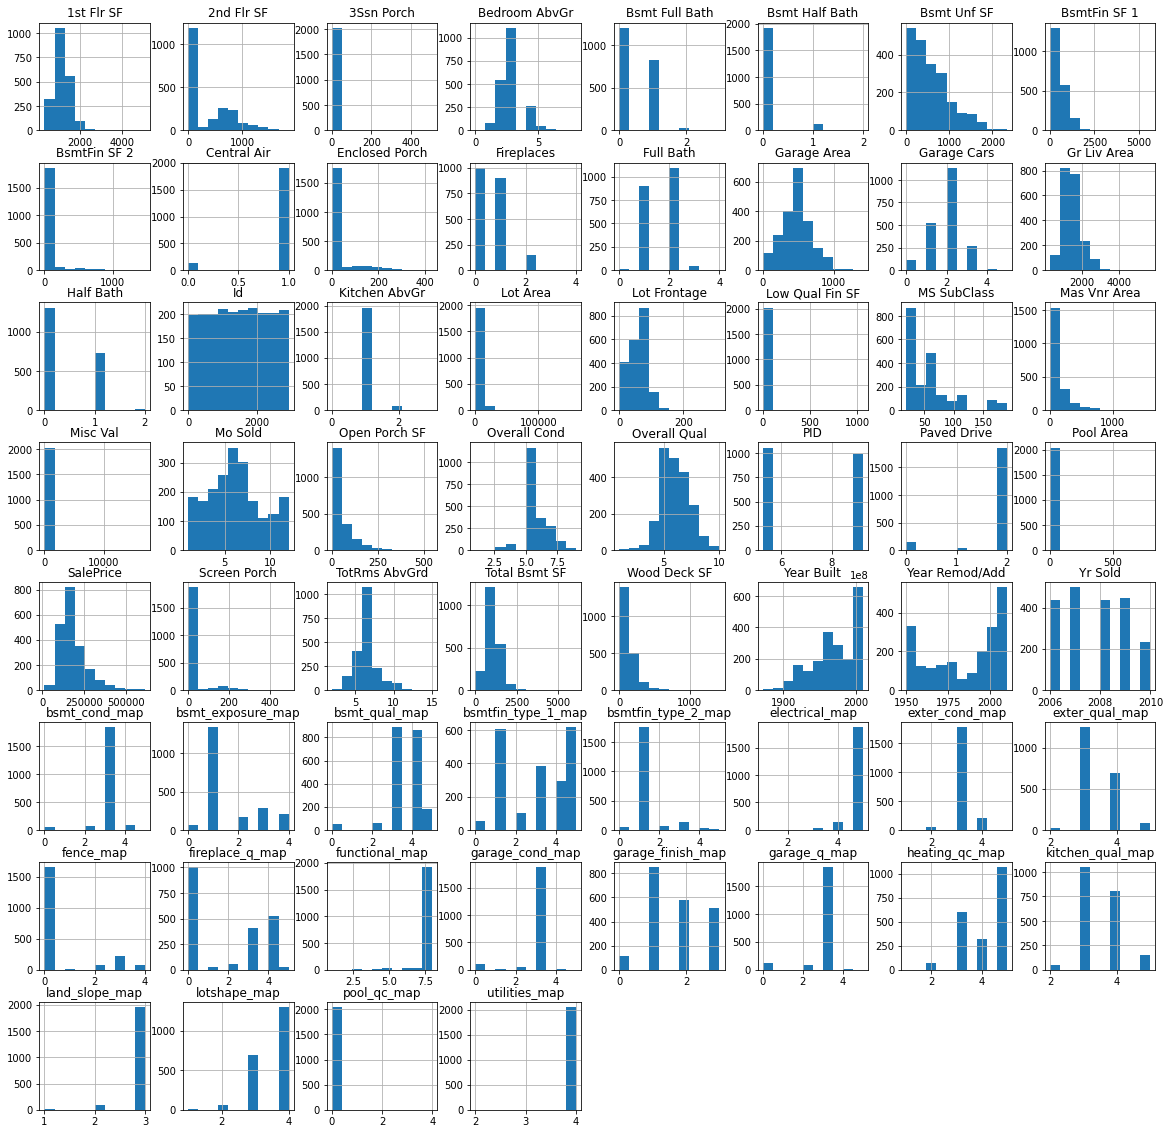

In [32]:
df.hist(figsize=(20,20));

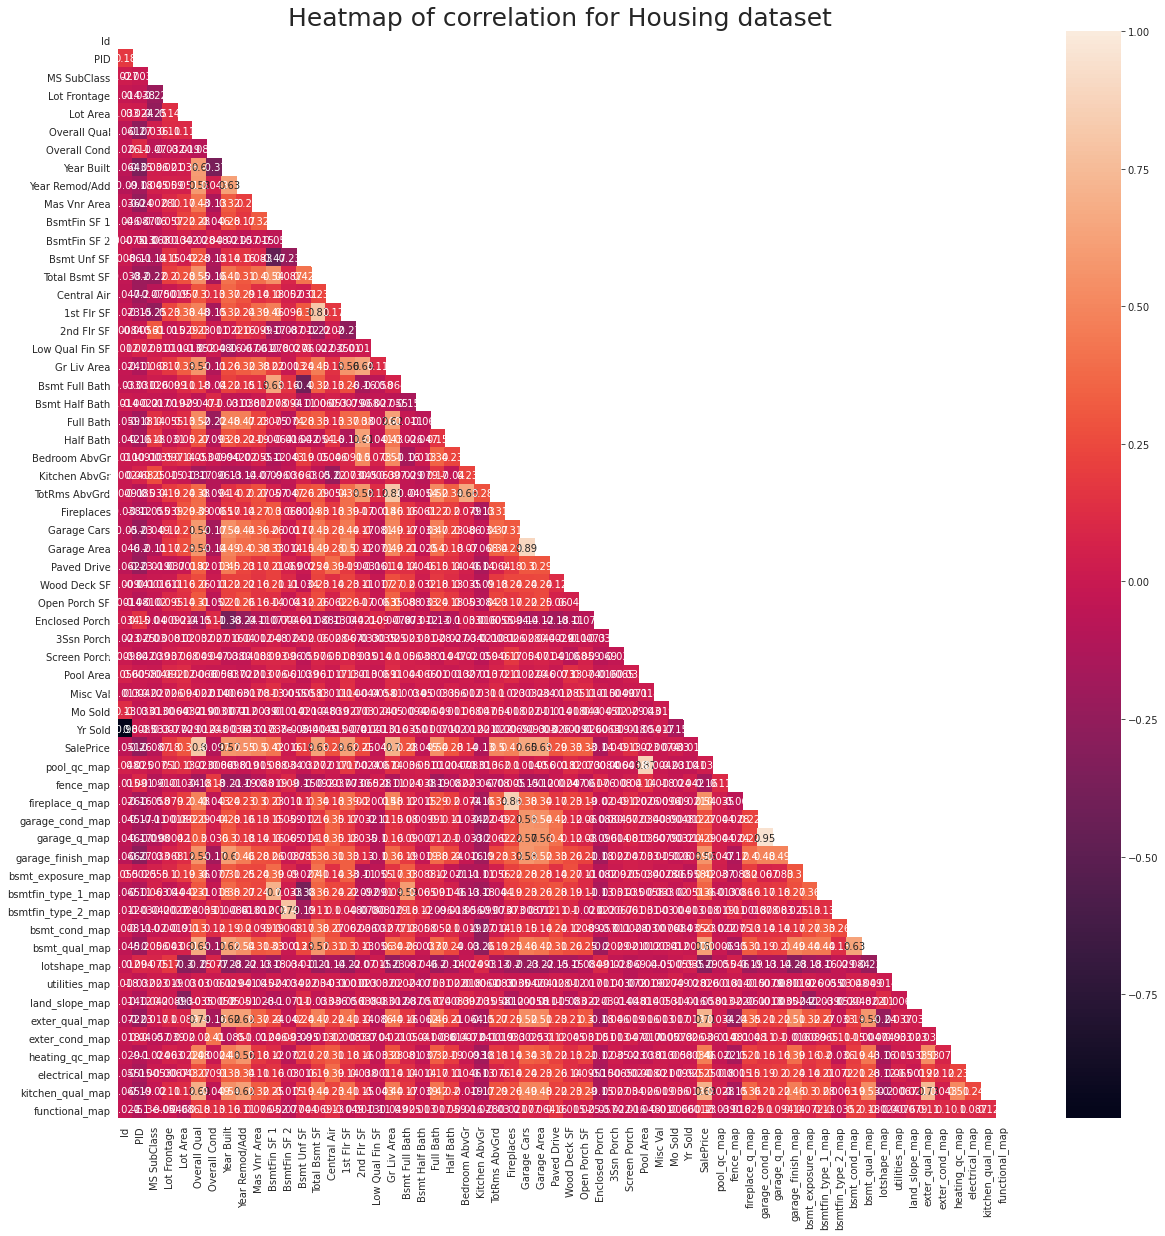

In [33]:
plt.figure(figsize=(20,20))

mask = np.zeros_like(df.corr())
#mask 
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    ax = sns.heatmap(df.corr(),mask=mask, annot=True) 
    ax.set_title("Heatmap of correlation for Housing dataset ", fontsize=25);

### Convert categorical variable into dummy/indicator variables.

In [34]:
df=pd.get_dummies(data=df, columns=['MS Zoning','Street', 'Neighborhood','Alley','Land Contour','Lot Config','Condition 1','Condition 2','Bldg Type','House Style','Roof Style','Roof Matl','Exterior 1st','Exterior 2nd','Mas Vnr Type','Foundation','Heating','Central Air','Garage Type','Misc Feature','Sale Type'],drop_first=True)

In [35]:
df.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,pool_qc_map,fence_map,fireplace_q_map,garage_cond_map,garage_q_map,garage_finish_map,bsmt_exposure_map,bsmtfin_type_1_map,bsmtfin_type_2_map,bsmt_cond_map,bsmt_qual_map,lotshape_map,utilities_map,land_slope_map,exter_qual_map,exter_cond_map,heating_qc_map,electrical_map,kitchen_qual_map,functional_map,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Alley_NA,Alley_Pave,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_NA,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_1,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_NA,Misc Feature_Gar2,Misc Feature_NA,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,109,533352170,60,0.0,13517,6,8,1976,2005,289.0,533.0,0.0,192.0,725.0,725,754,0,1479,0.0,0.0,2,1,3,1,6,0,2.0,475.0,2,0,44,0,0,0,0,0,3,2010,130500,0,0,0,3,3,2,1,5,1,3,3,3,4,3,4,3,5,5,4,8,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,544,531379050,60,43.0,11492,7,5,1996,1997,132.0,637.0,0.0,276.0,913.0,913,1209,0,2122,1.0,0.0,2,1,4,1,8,1,2.0,559.0,2,0,74,0,0,0,0,0,4,2009,220000,0,0,3,3,3,2,1,5,1,3,4,3,4,3,4,3,5,5,4,8,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,

In [36]:
df.shape

(2051, 199)

In [37]:
# looks at those which has high correlation with SalePrice column (Post Encoding of Categorical features)
df.corr()['SalePrice'].sort_values(ascending=False)

SalePrice               1.000000
Overall Qual            0.800207
exter_qual_map          0.712146
Gr Liv Area             0.697038
kitchen_qual_map        0.692336
Garage Area             0.649897
Garage Cars             0.647781
Total Bsmt SF           0.629303
1st Flr SF              0.618486
bsmt_qual_map           0.612188
Year Built              0.571849
garage_finish_map       0.557839
Year Remod/Add          0.550370
fireplace_q_map         0.538925
Full Bath               0.537969
Foundation_PConc        0.529047
TotRms AbvGrd           0.504014
Mas Vnr Area            0.503579
Fireplaces              0.471093
heating_qc_map          0.458354
Neighborhood_NridgHt    0.448647
bsmt_exposure_map       0.424863
BsmtFin SF 1            0.423856
bsmtfin_type_1_map      0.358949
Sale Type_New           0.358102
Garage Type_Attchd      0.357879
Exterior 1st_VinylSd    0.342146
Exterior 2nd_VinylSd    0.337563
Open Porch SF           0.333476
Wood Deck SF            0.326490
Mas Vnr Ty

#### From the above, Post application of encoding for the Categorical variables, these are the features that has strong correlation to Sale Price.

#### Positive Correlation to Sale Price (> 50% correlation)
- Overall Qual: Rates the overall material and finish of the house
- Exter Qual: Evaluates the quality of the material on the exterior
- Gr Liv Area: Above grade (ground) living area square feet    
- KitchenQual: Kitchen quality
- Garage Area: Size of garage in square feet  
- Garage Cars: Size of garage in car capacity (addition) 
- Total Bsmt SF: Total square feet of basement area
- Bsmt Qual (Ordinal): Evaluates the height of the basement
- Year Built: Original construction date
- Garage Finish: Interior finish of the garage
- FireplaceQu (Ordinal): Fireplace quality (addition) 
- FireplaceQu: Fireplace quality
- Full Bath: Full bathrooms above grade
- Foundation: Type of foundation
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Mas Vnr Area: Masonry veneer area in square feet


#### Negative Correlation to Sale Price
- Mas Vnr Type: Masonry veneer type
- Garage Type: Garage location
- Foundation: Type of foundation
- Lot Shape: General shape of property
- MS Zoning: Identifies the general zoning classification of the sale
- Central Air: Central air conditioning
- PID: Parcel identification number  - can be used with city web site for parcel review
- Roof Style: Type of roof
- Garage Type (Nominal): Garage location
- Fence: Fence quality

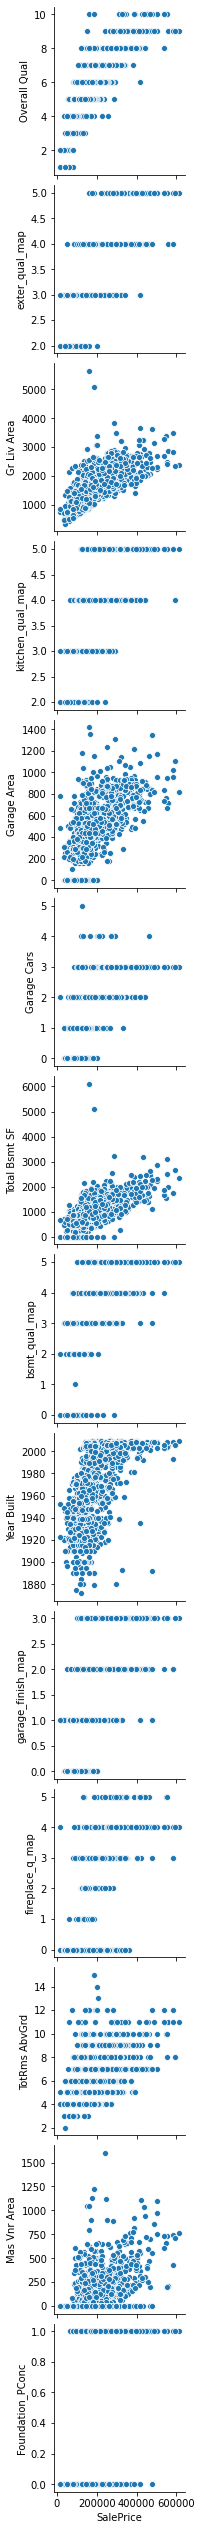

In [38]:
sns.pairplot(df,y_vars=['Overall Qual','exter_qual_map','Gr Liv Area','kitchen_qual_map','Garage Area','Garage Cars','Total Bsmt SF','bsmt_qual_map','Year Built','garage_finish_map','fireplace_q_map','TotRms AbvGrd','Mas Vnr Area','Foundation_PConc'],x_vars=['SalePrice']);

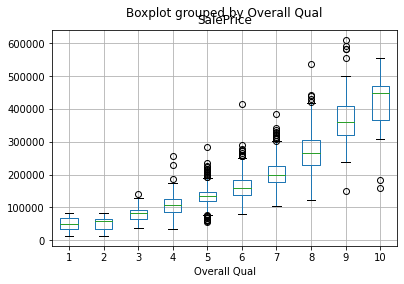

In [39]:
df.boxplot(column='SalePrice', by='Overall Qual');

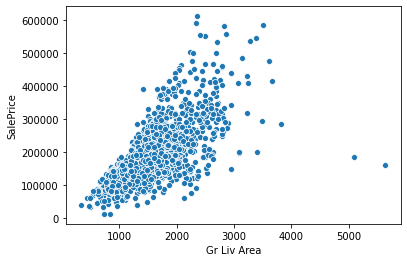

In [40]:
sns.scatterplot(df['Gr Liv Area'],df['SalePrice']);

In [41]:
df[df['Gr Liv Area']>4000]

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,pool_qc_map,fence_map,fireplace_q_map,garage_cond_map,garage_q_map,garage_finish_map,bsmt_exposure_map,bsmtfin_type_1_map,bsmtfin_type_2_map,bsmt_cond_map,bsmt_qual_map,lotshape_map,utilities_map,land_slope_map,exter_qual_map,exter_cond_map,heating_qc_map,electrical_map,kitchen_qual_map,functional_map,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Alley_NA,Alley_Pave,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_NA,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_1,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_NA,Misc Feature_Gar2,Misc Feature_NA,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
960,1499,908154235,60,313.0,63887,10,5,2008,2008,796.0,5644.0,0.0,466.0,6110.0,4692,950,0,5642,2.0,0.0,2,1,3,1,12,3,2.0,1418.0,2,214,292,0,0,0,480,0,1,2008,160000,3,0,4,3,3,3,4,5,1,3,5,1,4,3,5,3,5,5,5,8,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1885,2181,908154195,20,128.0,39290,10,5,2008,2009,1224.0,4010.0,0.0,1085.0,5095.0,5095,0,0,5095,1.0,1.0,2,1,2,1,15,2,3.0,1154.0,2,546,484,0,0,0,0,17000,10,2007,183850,0,0,4,3,3,3,4,5,1,3,5,3,4,3,5,3,5,5,5,8,

In [42]:
df_Edwards=df[df['Neighborhood_Edwards']==1][['Yr Sold','Overall Qual','Gr Liv Area','SalePrice']]
df_Edwards['psf']= round(df_Edwards['SalePrice']/df_Edwards['Gr Liv Area'],2)

In [43]:
df_Edwards.sort_values('Gr Liv Area',ascending=False)

,Yr Sold,Overall Qual,Gr Liv Area,SalePrice,psf
960,2008,10,5642,160000,28.36
1885,2007,10,5095,183850,36.08
616,2008,5,3820,284700,74.53
1897,2006,6,3672,415000,113.02
1049,2007,5,2233,141000,63.14
1249,2006,6,2201,274970,124.93
1325,2008,5,2200,145900,66.32
1198,2007,6,2158,243000,112.60
1994,2008,6,2108,235000,111.48
1360,2006,6,2009,235000,116.97


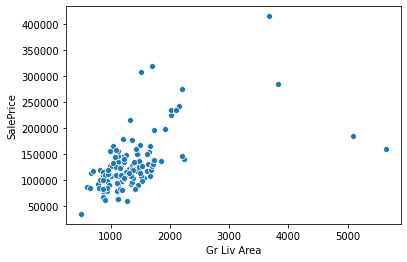

In [44]:
sns.scatterplot(df_Edwards['Gr Liv Area'],df_Edwards['SalePrice']);

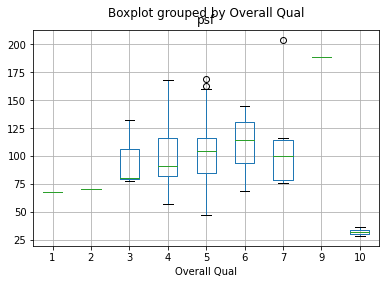

In [45]:
df_Edwards.boxplot(column='psf', by='Overall Qual');

In [46]:
df_Edwards[df_Edwards['Overall Qual']==7]

## The sale price looks legitimate as it was sold in 2010.

,Yr Sold,Overall Qual,Gr Liv Area,SalePrice,psf
67,2006,7,1708,130000,76.11
70,2010,7,1508,308030,204.26
73,2006,7,1709,137500,80.46
146,2009,7,1922,198500,103.28
344,2006,7,1709,134000,78.41
872,2006,7,1709,130000,76.07
1189,2008,7,1079,125600,116.40
1261,2008,7,1656,165400,99.88
1337,2006,7,1724,196500,113.98


#### The box plot shows that the better the overall material and finish of the house, the higher the sale price, likwise the greater the living area (in sq ft), the higher the sale price.

#### However, we noticed that there are 2 properties where the price is absurb, they are both in the same neighbourhood (Edwards), and they have excellent condition (10), but per sq ft it is only sold between $28 - $37 per psf. As such, we are to remove these 2 outliers

In [47]:
df.drop([960,1885],inplace=True)

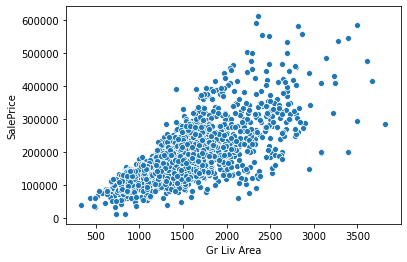

In [48]:
sns.scatterplot(df['Gr Liv Area'],df['SalePrice']);

In [49]:
df_by_year=df.loc[:,['Yr Sold','Overall Qual','Gr Liv Area','SalePrice']]
df_by_year['psf']= round(df_by_year['SalePrice']/df_by_year['Gr Liv Area'],2)
df_by_year.head()

,Yr Sold,Overall Qual,Gr Liv Area,SalePrice,psf
0,2010,6,1479,130500,88.24
1,2009,7,2122,220000,103.68
2,2010,5,1057,109000,103.12
3,2010,5,1444,174000,120.50
4,2010,6,1445,138500,95.85


In [50]:
df_by_year.groupby(['Yr Sold','Overall Qual'])['psf'].mean()

Yr Sold  Overall Qual
2006     1                50.940000
         2                71.920000
         3                88.263846
         4                94.202143
         5               113.448699
         6               118.125234
         7               122.130729
         8               143.477111
         9               177.785556
         10              172.752000
2007     1               117.660000
         2                80.600000
         3                87.400000
         4               102.635897
         5               113.756923
         6               113.164071
         7               129.223235
         8               147.490000
         9               181.179167
         10              210.642000
2008     1                17.870000
         3                62.775000
         4               101.870294
         5               113.302353
         6               113.659065
         7               123.442340
         8               151.769200
      

### Further Feature Reduction

In [51]:
# Combine the wood_deck and porches
df['Wood_deck_Porches']=df['Wood Deck SF']+df['Open Porch SF']+df['Enclosed Porch']+df['3Ssn Porch']+df['Screen Porch']
df.drop(['Wood Deck SF','Open Porch SF','Enclosed Porch','3Ssn Porch','Screen Porch'],axis=1,inplace=True)

In [52]:
# Combine the bathrooms
df['Total_Bathrooms']=df['Bsmt Full Bath']+df['Bsmt Half Bath']+df['Full Bath']+df['Half Bath']
df.drop(['Bsmt Full Bath','Bsmt Half Bath','Full Bath','Half Bath'],axis=1,inplace=True)

In [53]:
# Drop these features since they are represented by Total Bsmt SF
df.drop(['BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF'],axis=1,inplace=True)

In [54]:
# Drop these features since they are represented by Gr Liv Area
df.drop(['1st Flr SF','2nd Flr SF','Low Qual Fin SF'],axis=1,inplace=True)

## Test Dataset

In [55]:
# testing data sets
df_test=pd.read_csv("datasets/test.csv")

In [56]:
# Test set has 8 rows and 81 columns
df_test.shape

(879, 80)

In [57]:
df_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


## Analyze the missing test_data

In [58]:
# To check columns with missing values and rank in descending order
df_test_new=pd.DataFrame(df_test.isnull().sum())
df_test_new['by pct']=df_test_new[0]/len(df_test)
df_test_new[df_test_new[0].values>0].sort_values('by pct', ascending=False)

,0,by pct
Pool QC,875,0.995449
Misc Feature,838,0.953356
Alley,821,0.934016
Fence,707,0.804323
Fireplace Qu,422,0.480091
Lot Frontage,160,0.182025
Garage Yr Blt,45,0.051195
Garage Finish,45,0.051195
Garage Qual,45,0.051195
Garage Cond,45,0.051195


In [59]:
#### we will use data inputation to map the NA values for the missing ordinal data 

#Pool QC (Ordinal): Pool quality
pool_qc_map={
'Ex':4,
'Gd':3,
'TA':2, 
'Fa':1,
np.nan:0
}
df_test['pool_qc_map'] = df_test['Pool QC'].map(pool_qc_map)
df_test.drop('Pool QC',axis=1,inplace=True)


#Fence (Ordinal): Fence quality
fence_map={
'GdPrv':4,
'MnPrv':3,
'GdWo':2, 
'MnWw':1,
np.nan:0
}
df_test['fence_map'] = df_test['Fence'].map(fence_map)
df_test.drop('Fence',axis=1,inplace=True)


#FireplaceQu (Ordinal): Fireplace quality
fireplace_q_map={
'Ex':5,
'Gd':4,
'TA':3, 
'Fa':2,
'Po':1,
np.nan:0
}
df_test['fireplace_q_map'] = df_test['Fireplace Qu'].map(fireplace_q_map)
df_test.drop('Fireplace Qu',axis=1,inplace=True)

#Garage Cond (Ordinal): Garage condition
garage_cond_map={
'Ex':5,
'Gd':4,
'TA':3, 
'Fa':2,
'Po':1,
np.nan:0
}
df_test['garage_cond_map'] = df_test['Garage Cond'].map(garage_cond_map)
df_test.drop('Garage Cond',axis=1,inplace=True)

#Garage Qual (Ordinal): Garage quality
garage_q_map={
'Ex':5,
'Gd':4,
'TA':3, 
'Fa':2,
'Po':1,
np.nan:0
}
df_test['garage_q_map'] = df_test['Garage Qual'].map(garage_q_map)
df_test.drop('Garage Qual',axis=1,inplace=True)

#Garage Finish (Ordinal): Interior finish of the garage
garage_finish_map={
'Fin':3,
'RFn':2,
'Unf':1, 
np.nan:0
}
df_test['garage_finish_map'] = df_test['Garage Finish'].map(garage_finish_map)
df_test.drop('Garage Finish',axis=1,inplace=True)

#Bsmt Exposure (Ordinal): Refers to walkout or garden level walls
bsmt_exposure_map={
'Gd':4,
'Av':3,
'Mn':2,
'No':1,
np.nan:0
}
df_test['bsmt_exposure_map'] = df_test['Bsmt Exposure'].map(bsmt_exposure_map)
df_test.drop('Bsmt Exposure',axis=1,inplace=True)

#BsmtFin Type 1	(Ordinal): Rating of basement finished area
bsmtfin_type_1_map={
'GLQ':5,
'ALQ':4,
'BLQ':3,
'Rec':3,
'LwQ':2,
'Unf':1,
np.nan:0
}
df_test['bsmtfin_type_1_map'] = df_test['BsmtFin Type 1'].map(bsmtfin_type_1_map)
df_test.drop('BsmtFin Type 1',axis=1,inplace=True)


#BsmtFinType 2	(Ordinal): Rating of basement finished area (if multiple types)
bsmtfin_type_2_map={
'GLQ':5,
'ALQ':4,
'BLQ':3,
'Rec':3,
'LwQ':2,
'Unf':1,
np.nan:0
}
df_test['bsmtfin_type_2_map'] = df_test['BsmtFin Type 2'].map(bsmtfin_type_2_map)
df_test.drop('BsmtFin Type 2',axis=1,inplace=True)

#Bsmt Cond (Ordinal): Evaluates the general condition of the basement
bsmt_cond_map={
'Ex':5,
'Gd':4,
'TA':3,
'Fa':2,
'Po':1,
np.nan:0
}
df_test['bsmt_cond_map'] = df_test['Bsmt Cond'].map(bsmt_cond_map)
df_test.drop('Bsmt Cond',axis=1,inplace=True)

#Bsmt Qual (Ordinal): Evaluates the height of the basement
bsmt_qual_map={
'Ex':5,
'Gd':4,
'TA':3,
'Fa':2,
'Po':1,
np.nan:0
}
df_test['bsmt_qual_map'] = df_test['Bsmt Qual'].map(bsmt_qual_map)
df_test.drop('Bsmt Qual',axis=1,inplace=True)

In [60]:
# To check columns with missing values and rank in descending order
df_test_new=pd.DataFrame(df_test.isnull().sum())
df_test_new['by pct']=df_test_new[0]/len(df_test)
df_test_new[df_test_new[0].values>0].sort_values('by pct', ascending=False)

,0,by pct
Misc Feature,838,0.953356
Alley,821,0.934016
Lot Frontage,160,0.182025
Garage Yr Blt,45,0.051195
Garage Type,44,0.050057
Mas Vnr Type,1,0.001138
Mas Vnr Area,1,0.001138
Electrical,1,0.001138


### Missing Nominal Values

In [61]:
# 1. Misc Feature (Nominal): Miscellaneous feature not covered in other categories
    # Elev	Elevator
    # Gar2	2nd Garage (if not described in garage section)
    # Othr	Other
    # Shed	Shed (over 100 SF)
    # TenC	Tennis Court
    # NA	None

print(df_test['Misc Feature'].unique())
df_test['Misc Feature'].value_counts()

[nan 'Shed' 'Othr' 'Gar2']


Shed    39
Gar2     1
Othr     1
Name: Misc Feature, dtype: int64

In [62]:
df_test['Misc Feature']=df_test['Misc Feature'].fillna('NA')

In [63]:
# 2. Alley (Nominal): Type of alley access to property
    # Grvl	Gravel
    # Pave	Paved
    # NA 	No alley access
    
print(df_test['Alley'].unique())
df_test['Alley'].value_counts()

['Grvl' nan 'Pave']


Grvl    35
Pave    23
Name: Alley, dtype: int64

In [64]:
df_test['Alley']=df_test['Alley'].fillna('NA')

In [65]:
# 3. Lot Frontage (Continuous): Linear feet of street connected to property
    
df_test['Lot Frontage']=df_test['Lot Frontage'].fillna(0)

In [66]:
# 4. Garage Yr Blt (Discrete): Year garage was built
# drop the column because we couln't infer the missing data, we assume that there is nothing special about this column
df_test.drop('Garage Yr Blt',axis=1,inplace=True)

In [67]:
# 5. Garage Type (Nominal): Garage location
    # 2Types	More than one type of garage
    # Attchd	Attached to home
    # Basment	Basement Garage
    # BuiltIn	Built-In (Garage part of house - typically has room above garage)
    # CarPort	Car Port
    # Detchd	Detached from home
    # NA	No Garage
print(df_test['Garage Type'].unique())
df_test['Garage Type'].value_counts()

['Detchd' 'Attchd' 'BuiltIn' nan '2Types' 'CarPort' 'Basment']


Attchd     518
Detchd     246
BuiltIn     54
Basment      9
CarPort      4
2Types       4
Name: Garage Type, dtype: int64

In [68]:
df_test[['Garage Type','Mas Vnr Type']]=df_test[['Garage Type','Mas Vnr Type']].fillna('NA')
df_test['Mas Vnr Area']=df_test['Mas Vnr Area'].fillna(0)


In [69]:
df_test[df_test['Electrical'].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,pool_qc_map,fence_map,fireplace_q_map,garage_cond_map,garage_q_map,garage_finish_map,bsmt_exposure_map,bsmtfin_type_1_map,bsmtfin_type_2_map,bsmt_cond_map,bsmt_qual_map
635,1578,916386080,80,RL,73.0,9735,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,0,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,BuiltIn,2,400,Y,100,0,0,0,0,0,NA,0,5,2008,WD,0,0,0,3,3,3,1,1,1,3,4


In [70]:
df_test[(df_test['MS SubClass']==80) & (df_test['MS Zoning']=='RL')][['MS SubClass','MS Zoning','Utilities','Year Built','Heating','Electrical']].sort_values('Year Built')

,MS SubClass,MS Zoning,Utilities,Year Built,Heating,Electrical
719,80,RL,AllPub,1955,GasA,SBrkr
200,80,RL,AllPub,1956,GasA,FuseA
746,80,RL,AllPub,1956,GasA,SBrkr
199,80,RL,AllPub,1958,GasA,SBrkr
405,80,RL,AllPub,1960,GasA,SBrkr
660,80,RL,AllPub,1962,GasA,SBrkr
173,80,RL,AllPub,1962,GasA,SBrkr
754,80,RL,AllPub,1964,GasA,SBrkr
203,80,RL,AllPub,1964,GasA,SBrkr
269,80,RL,AllPub,1964,GasA,SBrkr


In [71]:
## We update the NAN value to 'SBrkr' as it was the mode in the similar Zoning and MS Subclass.  
df_test['Electrical']=df_test['Electrical'].fillna('SBrkr')

In [72]:
df_test[(df_test['MS SubClass']==80) & (df_test['MS Zoning']=='RL')][['MS SubClass','MS Zoning','Utilities','Year Built','Heating','Electrical']].sort_values('Year Built')

,MS SubClass,MS Zoning,Utilities,Year Built,Heating,Electrical
719,80,RL,AllPub,1955,GasA,SBrkr
200,80,RL,AllPub,1956,GasA,FuseA
746,80,RL,AllPub,1956,GasA,SBrkr
199,80,RL,AllPub,1958,GasA,SBrkr
405,80,RL,AllPub,1960,GasA,SBrkr
660,80,RL,AllPub,1962,GasA,SBrkr
173,80,RL,AllPub,1962,GasA,SBrkr
754,80,RL,AllPub,1964,GasA,SBrkr
203,80,RL,AllPub,1964,GasA,SBrkr
269,80,RL,AllPub,1964,GasA,SBrkr


In [73]:
# To check columns with missing values and rank in descending order
df_test_new=pd.DataFrame(df_test.isnull().sum())
df_test_new['by pct']=df_test_new[0]/len(df_test)
df_test_new[df_test_new[0].values>0].sort_values('by pct', ascending=False)

,0,by pct


### For the Non Missing ordinal data, we map it using a custom encoding\mapping scheme

In [74]:
#Lot Shape (Ordinal): General shape of property
lot_shape_map={
'Reg':4,
'IR1':3,
'IR2':2,
'IR3':1
}
df_test['lotshape_map'] = df_test['Lot Shape'].map(lot_shape_map)
df_test.drop('Lot Shape',axis=1,inplace=True)

#Utilities (Ordinal): Type of utilities available
utilities_map={
'AllPub':4,
'NoSewr':3,
'NoSeWa':2,
'ELO':1
}
df_test['utilities_map'] = df_test['Utilities'].map(utilities_map)
df_test.drop('Utilities',axis=1,inplace=True)

#Land Slope (Ordinal): Slope of property
land_slope_map={
'Gtl':3,
'Mod':2,
'Sev':1
}
df_test['land_slope_map'] = df_test['Land Slope'].map(land_slope_map)
df_test.drop('Land Slope',axis=1,inplace=True)

#Exter Qual (Ordinal): Evaluates the quality of the material on the exterior 
exter_qual_map={
'Ex':5,
'Gd':4,
'TA':3,
'Fa':2,
'Po':1
}
df_test['exter_qual_map'] = df_test['Exter Qual'].map(exter_qual_map)
df_test.drop('Exter Qual',axis=1,inplace=True)

#Exter Cond (Ordinal): Evaluates the present condition of the material on the exterior
exter_cond_map={
'Ex':5,
'Gd':4,
'TA':3,
'Fa':2,
'Po':1
}
df_test['exter_cond_map'] = df_test['Exter Cond'].map(exter_cond_map)
df_test.drop('Exter Cond',axis=1,inplace=True)

#HeatingQC (Ordinal): Heating quality and condition
heating_qc_map={
'Ex':5,
'Gd':4,
'TA':3,
'Fa':2,
'Po':1
}
df_test['heating_qc_map'] = df_test['Heating QC'].map(heating_qc_map)
df_test.drop('Heating QC',axis=1,inplace=True)

#Central Air (Nominal): Central air conditioning
df_test['Central Air']=df_test['Central Air'].map({'Y':1,'N':0})

#Electrical (Ordinal): Electrical system
electrical_map={
'SBrkr':5,
'FuseA':4,
'FuseF':3,
'FuseP':2,
'Mix':1
}
df_test['electrical_map'] = df_test['Electrical'].map(electrical_map)
df_test.drop('Electrical',axis=1,inplace=True)

#KitchenQual (Ordinal): Kitchen quality
kitchen_qual_map={
'Ex':5,
'Gd':4,
'TA':3,
'Fa':2,
'Po':1
}
df_test['kitchen_qual_map'] = df_test['Kitchen Qual'].map(kitchen_qual_map)
df_test.drop('Kitchen Qual',axis=1,inplace=True)


#Functional (Ordinal): Home functionality (Assume typical unless deductions are warranted)
functional_map={
'Typ':8,
'Min1':7,
'Min2':6,
'Mod':5,
'Maj1':4,
'Maj2':3,
'Sev':2,
'Sal':1
}
df_test['functional_map'] = df_test['Functional'].map(functional_map)
df_test.drop('Functional',axis=1,inplace=True)


#Paved Drive (Ordinal): Paved driveway
df_test['Paved Drive']=df_test['Paved Drive'].map({'Y':2,'P':1,'N':0})

In [75]:
df_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Land Contour,Lot Config,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Foundation,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Central Air,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Type,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,pool_qc_map,fence_map,fireplace_q_map,garage_cond_map,garage_q_map,garage_finish_map,bsmt_exposure_map,bsmtfin_type_1_map,bsmtfin_type_2_map,bsmt_cond_map,bsmt_qual_map,lotshape_map,utilities_map,land_slope_map,exter_qual_map,exter_cond_map,heating_qc_map,electrical_map,kitchen_qual_map,functional_map
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Lvl,Inside,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,Stone,0,0,1020,1020,GasA,0,908,1020,0,1928,0,0,2,0,4,2,9,0,Detchd,1,440,2,0,60,112,0,0,0,NA,0,4,2006,WD,0,0,0,1,1,1,1,1,1,3,2,4,4,3,3,2,4,2,2,8
1,2718,905108090,90,RL,0.0,9662,Pave,NA,Lvl,Inside,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,CBlock,0,0,1967,1967,GasA,1,1967,0,0,1967,0,0,2,0,6,2,10,0,Attchd,2,580,2,170,0,0,0,0,0,NA,0,8,2006,WD,0,0,0,3,3,3,1,1,1,3,4,3,4,3,3,3,3,5,3,8
2,2414,528218130,60,RL,58.0,17104,Pave,NA,Lvl,Inside,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,PConc,554,0,100,654,GasA,1,664,832,0,1496,1,0,2,1,3,1,7,1,Attchd,2,426,2,100,24,0,0,0,0,NA,0,9,2006,New,0,0,4,3,3,2,3,5,1,4,4,3,4,3,4,3,5,5,4,8
3,1989,902207150,30,RM,60.0,8520,Pave,NA,Lvl,Inside,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,CBlock,0,0,968,968,GasA,1,968,0,0,968,0,0,1,0,2,1,5,0,Detchd,2,480,0,0,0,184,0,0,0,NA,0,7,2007,WD,0,0,0,3,2,1,1,1,1,3,3,4,4,3,4,3,3,5,3,8
4,625,535105100,20,RL,0.0,9500,Pave,NA,Lvl,Inside,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,CBlock,609,0,785,1394,GasA,1,1394,0,0,1394,1,0,1,1,3,1,6,2,Attchd,2,514,2,0,76,0,0,185,0,NA,0,7,2009,WD,0,0,4,3,3,2,1,3,1,3,4,3,4,3,3,3,4,5,3,8


### Further Feature Reduction for test_data

In [76]:
# Combine the wood_deck and porches
df_test['Wood_deck_Porches']=df_test['Wood Deck SF']+df_test['Open Porch SF']+df_test['Enclosed Porch']+df_test['3Ssn Porch']+df_test['Screen Porch']
df_test.drop(['Wood Deck SF','Open Porch SF','Enclosed Porch','3Ssn Porch','Screen Porch'],axis=1,inplace=True)

In [77]:
# Combine the bathrooms
df_test['Total_Bathrooms']=df_test['Bsmt Full Bath']+df_test['Bsmt Half Bath']+df_test['Full Bath']+df_test['Half Bath']
df_test.drop(['Bsmt Full Bath','Bsmt Half Bath','Full Bath','Half Bath'],axis=1,inplace=True)

In [78]:
# Drop these features since they are represented by Total Bsmt SF
df_test.drop(['BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF'],axis=1,inplace=True)

In [79]:
# Drop these features since they are represented by Gr Liv Area
df_test.drop(['1st Flr SF','2nd Flr SF','Low Qual Fin SF'],axis=1,inplace=True)

### Convert categorical variable into dummy/indicator variables.

In [80]:
df_test=pd.get_dummies(data=df_test, columns=['MS Zoning','Street', 'Neighborhood','Alley','Land Contour','Lot Config','Condition 1','Condition 2','Bldg Type','House Style','Roof Style','Roof Matl','Exterior 1st','Exterior 2nd','Mas Vnr Type','Foundation','Heating','Central Air','Garage Type','Misc Feature','Sale Type'],drop_first=True)

In [81]:
df_test.shape

(879, 176)

In [82]:
df_test.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Total Bsmt SF,Gr Liv Area,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Paved Drive,Pool Area,Misc Val,Mo Sold,Yr Sold,pool_qc_map,fence_map,fireplace_q_map,garage_cond_map,garage_q_map,garage_finish_map,bsmt_exposure_map,bsmtfin_type_1_map,bsmtfin_type_2_map,bsmt_cond_map,bsmt_qual_map,lotshape_map,utilities_map,land_slope_map,exter_qual_map,exter_cond_map,heating_qc_map,electrical_map,kitchen_qual_map,functional_map,Wood_deck_Porches,Total_Bathrooms,MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Alley_NA,Alley_Pave,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_Metal,Roof Matl_Roll,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Other,Exterior 2nd_Plywood,Exterior 2nd_PreCast,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_CBlock,Mas Vnr Type_NA,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Central Air_1,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_NA,Misc Feature_NA,Misc Feature_Othr,Misc Feature_Shed,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD
0,2658,902301120,190,69.0,9142,6,8,1910,1950,0.0,1020,1928,4,2,9,0,1,440,2,0,0,4,2006,0,0,0,1,1,1,1,1,1,3,2,4,4,3,3,2,4,2,2,8,172,2,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
1,2718,905108090,90,0.0,9662,5,4,1977,1977,0.0,1967,1967,6,2,10,0,2,580,2,0,0,8,2006,0,0,0,3,3,3,1,1,1,3,4,3,4,3,3,3,3,5,3,8,170,2,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,2414,528218130,60,58.0,17104,7,5,2006,2006,0.0,654,1496,3,1,7,1,2,426,2,0,0,9,2006,0,0,4,3,3,2,3,5,1,4,4,3,4,3,4,3,5,5,4,8,124,4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0

## Get Unique columns for both train and test dataframe 

In [83]:
df_columns=pd.DataFrame(df.columns)
df_test_columns=pd.DataFrame(df_test.columns)
df_col=pd.merge(df_columns,df_test_columns)
df_col

,0
0,Id
1,PID
2,MS SubClass
3,Lot Frontage
4,Lot Area
5,Overall Qual
6,Overall Cond
7,Year Built
8,Year Remod/Add
9,Mas Vnr Area


In [84]:
df_col.shape

(168, 1)

## Unique features for both train and test datasets

In [85]:
features=df_col[0].tolist()

## Model Prep: Create our features matrix (`X`) and target vector (`y`)

In [86]:
X_train=df[features]
y_train=df['SalePrice']

In [87]:
X_train.shape

(2049, 168)

In [88]:
y_train.shape

(2049,)

## Model Prep: Scaling

In [89]:
ss=StandardScaler()
X_train_sc =ss.fit_transform(X_train)

## Model Prep: Instantiate our models

In [90]:
lr=LinearRegression()
lasso=LassoCV(n_alphas=200)
ridge = RidgeCV(alphas=np.linspace(0.1,10,200))

In [91]:
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.9224224693291422

## Cross validation

#### cross_val_score will return an array of MSE for each cross-validation steps

In [92]:
lr_scores=cross_val_score(lr,X_train_sc,y_train,cv=5)
#lr_scores
lr_scores.mean()

-4.7754965152710566e+23

In [93]:
lasso_score=cross_val_score(lasso,X_train_sc,y_train,cv=5) 
#lasso_score
lasso_score.mean()

0.9018445730592983

In [94]:
ridge_score=cross_val_score(ridge,X_train_sc,y_train,cv=5)
#ridge_score
ridge_score.mean()

0.8988140325217968

#### in this case that lasso is the best fitting method 

## Use GridSearchCV to estimate the alpha value for the lasso regression

In [95]:
%%time
param_grid={'n_alphas':np.arange(1,50)}
lasso=LassoCV(cv=5)
lasso_cv=GridSearchCV(lasso,param_grid,cv=5)
lasso_cv.fit(X_train_sc,y_train)
lasso_cv.best_params_

CPU times: user 4min 11s, sys: 21.8 s, total: 4min 33s
Wall time: 25.2 s


{'n_alphas': 16}

In [96]:
pd.DataFrame(lasso_cv.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_alphas,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.050388,0.004277,0.000703,0.000036,1,{'n_alphas': 1},0.887336,0.904735,0.909394,0.896609,0.901601,0.899935,0.007551,47
1,0.051938,0.005999,0.000667,0.000063,2,{'n_alphas': 2},0.887336,0.904735,0.909394,0.896609,0.901601,0.899935,0.007551,47
2,0.053670,0.005341,0.000699,0.000029,3,{'n_alphas': 3},0.887336,0.904735,0.909394,0.896609,0.901601,0.899935,0.007551,47
3,0.047732,0.001219,0.000641,0.000029,4,{'n_alphas': 4},0.889909,0.904871,0.908812,0.905237,0.898328,0.901432,0.006681,43
4,0.052917,0.001102,0.000693,0.000023,5,{'n_alphas': 5},0.889558,0.906218,0.910124,0.903536,0.901093,0.902106,0.006953,3


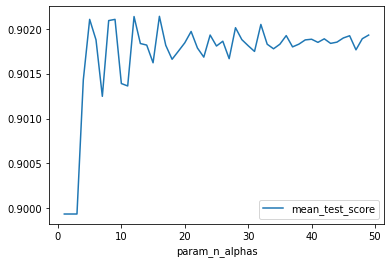

In [97]:
gs_df = pd.DataFrame(lasso_cv.cv_results_)
gs_df.plot(x='param_n_alphas', y='mean_test_score');

## Reinitiate the model with the new alpha

In [98]:
lasso_new=LassoCV(n_alphas=5,cv=5)
lasso_new_score=cross_val_score(lasso_new,X_train_sc,y_train,cv=5)  
lasso_new_score.mean()

0.9021059175157708

## Model Fitting and Evaluation

In [99]:
lasso_new.fit(X_train_sc,y_train)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=5, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [100]:
lasso_new.score(X_train_sc,y_train)

0.9174776153732606

In [101]:
lasso_new_score.mean()

0.9021059175157708

In [102]:
lasso_new.coef_

array([ 0.00000000e+00, -0.00000000e+00, -4.86679256e+03,  1.16155795e+03,
        3.73949373e+03,  1.10470487e+04,  5.02700973e+03,  6.70016312e+03,
        5.89907365e+02,  6.35627026e+03,  9.44437185e+03,  2.44852051e+04,
       -3.64984456e+03, -1.57767344e+03,  8.03703653e+02,  2.84260953e+03,
        0.00000000e+00,  5.58797740e+03,  1.76916732e+01,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -3.20491468e+01,  1.43267437e+02,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        5.33388622e+01,  5.38648975e+03,  4.57050555e+03, -0.00000000e+00,
       -2.90099034e+03,  1.14375792e+03, -0.00000000e+00,  5.20753784e+02,
       -0.00000000e+00,  5.32611412e+03, -0.00000000e+00,  8.13788763e+02,
       -2.42476755e+01,  4.97116026e+03,  3.42989191e+03,  5.48510604e+02,
        3.12915076e+02,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        1.53817589e+02,  0.00000000e+00,  3.65999975e+02,  1.04723619e+03,
       -0.00000000e+00, -

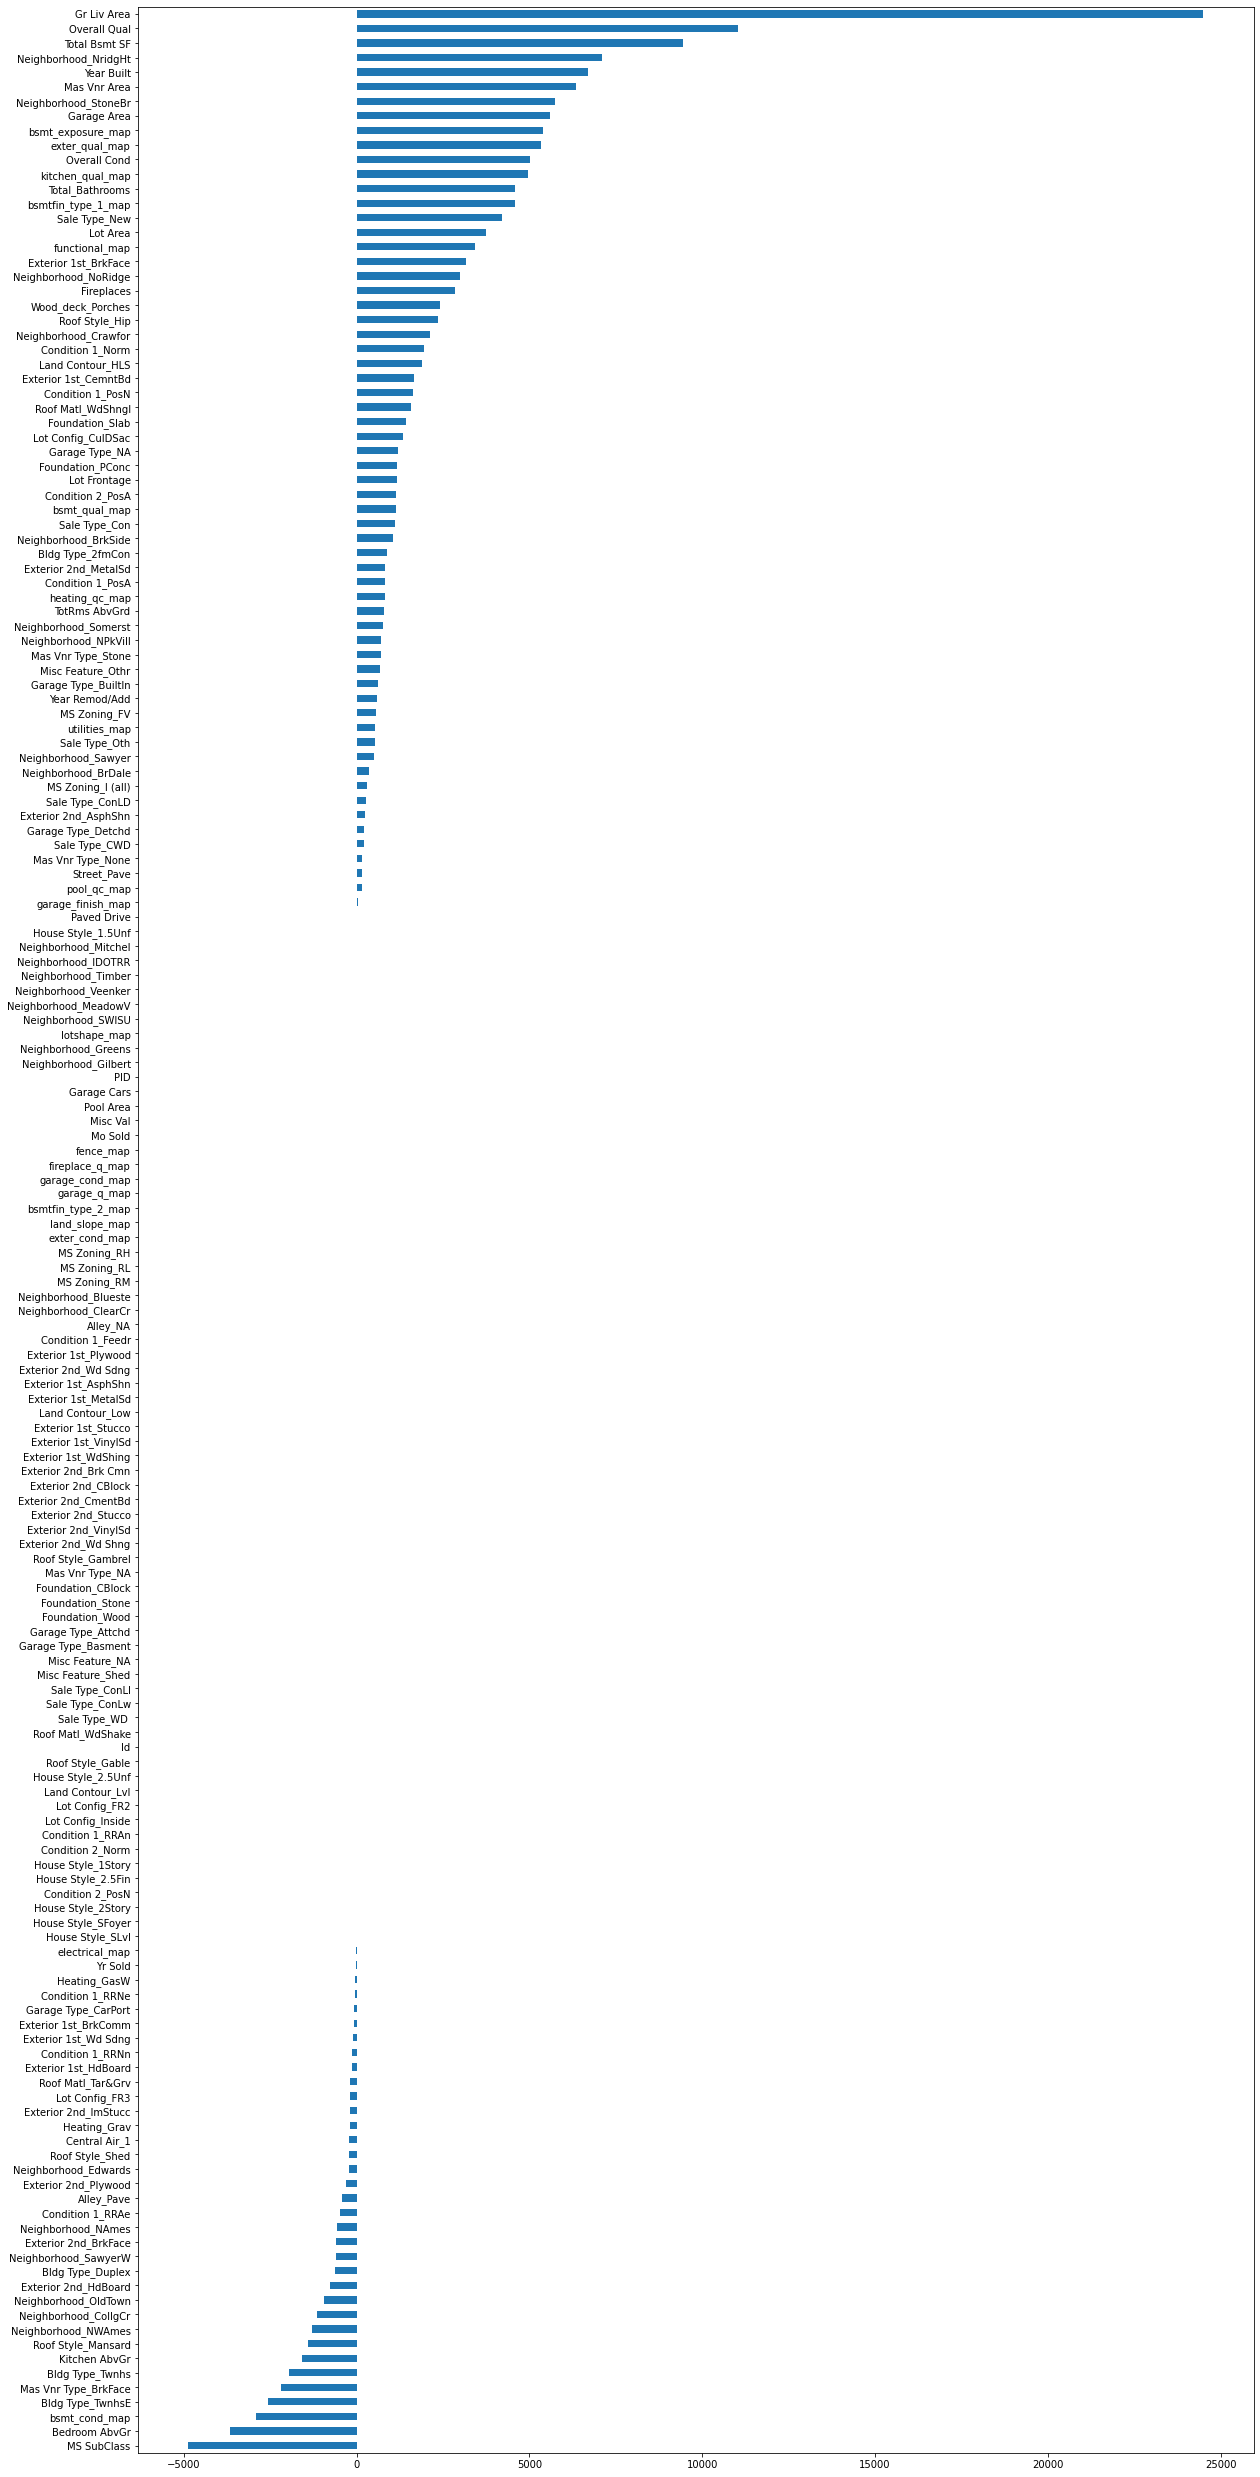

In [103]:
pd.Series(lasso_new.coef_, index=features).sort_values(ascending=True).plot.barh(figsize=(20,45))

## Filter for Features selected with Lasso CV

In [104]:
checks={j:i for j,i in zip([i for i in features],[j for j in lasso_new.coef_])}

# filter for features that are non-zerorised after applting Lasso CV  
inscope = dict()
for k,v in checks.items():
    if v!=0:
        inscope[k] = v
        
# Total features selected
len(inscope)

99

In [105]:
lasso_features=[k for k,v in inscope.items()] 
lasso_features

['MS SubClass',
 'Lot Frontage',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'Total Bsmt SF',
 'Gr Liv Area',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Area',
 'Paved Drive',
 'Yr Sold',
 'pool_qc_map',
 'garage_finish_map',
 'bsmt_exposure_map',
 'bsmtfin_type_1_map',
 'bsmt_cond_map',
 'bsmt_qual_map',
 'utilities_map',
 'exter_qual_map',
 'heating_qc_map',
 'electrical_map',
 'kitchen_qual_map',
 'functional_map',
 'MS Zoning_FV',
 'MS Zoning_I (all)',
 'Street_Pave',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Alley_Pave',
 'Land Contour_HLS',
 'Lot Config_CulDSac',
 'Lo

In [106]:
df_new=df[[i for i in lasso_features]]

In [107]:
df_new.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Total Bsmt SF,Gr Liv Area,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Area,Paved Drive,Yr Sold,pool_qc_map,garage_finish_map,bsmt_exposure_map,bsmtfin_type_1_map,bsmt_cond_map,bsmt_qual_map,utilities_map,exter_qual_map,heating_qc_map,electrical_map,kitchen_qual_map,functional_map,MS Zoning_FV,MS Zoning_I (all),Street_Pave,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Alley_Pave,Land Contour_HLS,Lot Config_CulDSac,Lot Config_FR3,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRNe,Condition 1_RRNn,Condition 2_PosA,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_Tar&Grv,Roof Matl_WdShngl,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_Wd Sdng,Exterior 2nd_AsphShn,Exterior 2nd_BrkFace,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_PConc,Foundation_Slab,Heating_GasW,Heating_Grav,Central Air_1,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_NA,Misc Feature_Othr,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_New,Sale Type_Oth,Wood_deck_Porches,Total_Bathrooms
0,60,0.0,13517,6,8,1976,2005,289.0,725.0,1479,3,1,6,0,475.0,2,2010,0,2,1,5,3,3,4,4,5,5,4,8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,44,3.0
1,60,43.0,11492,7,5,1996,1997,132.0,913.0,2122,4,1,8,1,559.0,2,2009,0,2,1,5,3,4,4,4,5,5,4,8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,74,4.0
2,20,68.0,7922,5,7,1953,2007,0.0,1057.0,1057,3,1,5,0,246.0,2,2010,0,1,1,5,3,3,4,3,3,5,4,8,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,52,2.0
3,60,73.0,9802,5,5,2006,2007,0.0,384.0,1444,3,1,7,0,400.0,2,2010,0,3,1,1,3,4,4,3,4,5,3,8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,100,3.0
4,50,82.0,14235,6,8,1900,1993,0.0,676.0,1445,3,1,6,0,484.0,0,2010,0,1,1,1,4,2,4,3,3,5,3,8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,59,2.0


## Model Prep 2: Create features matrix (`X`) and target vector (`y`) - Post LassoCV Feature Selection

In [108]:
X_train_newfeatures=df[lasso_features]
y_train=df['SalePrice']

In [109]:
X_train_newfeatures.shape

(2049, 99)

In [110]:
y_train.shape

(2049,)

In [111]:
ss=StandardScaler()
X_train_newfeatures =ss.fit_transform(X_train_newfeatures)

In [112]:
lasso_newfeatures=LassoCV(n_alphas=5,cv=5)
lasso_newfeatures_score=cross_val_score(lasso_new,X_train_newfeatures,y_train,cv=5)  
lasso_newfeatures_score.mean()

0.9047144941259555

## Model Fitting and Evaluation 2 - Post LassoCV Feature Selection

In [113]:
lasso_new.fit(X_train_newfeatures ,y_train)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=5, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [114]:
lasso_new.score(X_train_newfeatures ,y_train)

0.9197825954050938

In [115]:
lasso_new_score.mean()

0.9021059175157708

In [116]:
df_new.head().T

,0,1,2,3,4
MS SubClass,60.0,60.0,20.0,60.0,50.0
Lot Frontage,0.0,43.0,68.0,73.0,82.0
Lot Area,13517.0,11492.0,7922.0,9802.0,14235.0
Overall Qual,6.0,7.0,5.0,5.0,6.0
Overall Cond,8.0,5.0,7.0,5.0,8.0
Year Built,1976.0,1996.0,1953.0,2006.0,1900.0
Year Remod/Add,2005.0,1997.0,2007.0,2007.0,1993.0
Mas Vnr Area,289.0,132.0,0.0,0.0,0.0
Total Bsmt SF,725.0,913.0,1057.0,384.0,676.0
Gr Liv Area,1479.0,2122.0,1057.0,1444.0,1445.0


## Predicting with the test data

In [118]:
X_test=df_test[lasso_features]
X_test_sc =ss.transform(X_test)

In [119]:
df_test.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Total Bsmt SF,Gr Liv Area,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Paved Drive,Pool Area,Misc Val,Mo Sold,Yr Sold,pool_qc_map,fence_map,fireplace_q_map,garage_cond_map,garage_q_map,garage_finish_map,bsmt_exposure_map,bsmtfin_type_1_map,bsmtfin_type_2_map,bsmt_cond_map,bsmt_qual_map,lotshape_map,utilities_map,land_slope_map,exter_qual_map,exter_cond_map,heating_qc_map,electrical_map,kitchen_qual_map,functional_map,Wood_deck_Porches,Total_Bathrooms,MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Alley_NA,Alley_Pave,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_Metal,Roof Matl_Roll,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Other,Exterior 2nd_Plywood,Exterior 2nd_PreCast,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_CBlock,Mas Vnr Type_NA,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Central Air_1,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_NA,Misc Feature_NA,Misc Feature_Othr,Misc Feature_Shed,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD
0,2658,902301120,190,69.0,9142,6,8,1910,1950,0.0,1020,1928,4,2,9,0,1,440,2,0,0,4,2006,0,0,0,1,1,1,1,1,1,3,2,4,4,3,3,2,4,2,2,8,172,2,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
1,2718,905108090,90,0.0,9662,5,4,1977,1977,0.0,1967,1967,6,2,10,0,2,580,2,0,0,8,2006,0,0,0,3,3,3,1,1,1,3,4,3,4,3,3,3,3,5,3,8,170,2,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,2414,528218130,60,58.0,17104,7,5,2006,2006,0.0,654,1496,3,1,7,1,2,426,2,0,0,9,2006,0,0,4,3,3,2,3,5,1,4,4,3,4,3,4,3,5,5,4,8,124,4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0

In [120]:
pred=lasso_new.predict(X_test_sc)

In [121]:
kaggle=zip([i for i in df_test['Id']],[j for j in pred])

In [122]:
kaggle_df=pd.DataFrame(kaggle)

In [123]:
kaggle_df.rename(columns={0: 'Id',1: 'SalePrice'},inplace=True,index=None)

In [124]:
kaggle_df.to_csv("datasets/kaggle_submission.csv")

In [125]:
kaggle_df.shape

(879, 2)